<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/22.%20ANN_22_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For creating neural network models, we use libraries like - Keras, tensorflow, pytorch, mxnet
# mxnet is by amazon, pytorch is by facebook, keras and tensorflow are by google
# first neural network with keras tutorial
from pandas import read_csv # to read the dataset
from numpy import loadtxt # to load the dataset
from keras.models import Sequential # Neural networks will be in a sequential manner
from keras.layers import Dense # we can decide the number of hidden layers we can add
import tensorflow as tf #
import random as rn
# import os - not required for now
import numpy as np
# os.environ['PYTHONHASHSEED'] = '0' - not required for now
# np.random.seed(37) - not required for now
rn.seed(1254) #  to get the same accurarcy everytime we run the model
tf.random.set_seed(89) # This is to give same results whenever we run the model
# load the dataset
filename = 'pima-indians-diabetes.data.csv'
# This is a binary classification problem where we have to predict either 1 or 0
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] # Defining the columns
dataframe = read_csv(filename, names=names) # Reading the dataset
array = dataframe.values
# split into input (X) and output (y) variables
X = array[:,0:8]
y = array[:,8]
# define the keras model
model = Sequential() # initializing the neural network
# The model expects rows of data with 8 variables (the input_dim=8 argument)
# The first hidden layer has 12 neurons or nodes and uses the relu activation function.
model.add(Dense(12, input_dim=8, activation='relu'))
# The second hidden layer has 8 neurons and uses the relu activation function.
model.add(Dense(8, activation='relu'))
# The output layer has one neuron and uses the sigmoid activation function.
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
# When compiling, we must specify some additional properties required when training the network.
# Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.
# We must specify the loss function to use to evaluate a set of weights,
# the optimizer is used to search through different weights for the network -
# adam optimizer is better as it leads to faster convergence, i.e, in less no. of epochs we can reduce and stabilize the loss
# any accurarcy metrics helps to collect and report the performance of the model during training.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
# Fitting the model on X and y data, defining the batch size - here we are using the concept of minibatch gradient descent model
history = model.fit(X, y, epochs=150,validation_split=0.33, batch_size=10)
# evaluate the keras model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6173 - loss: 5.5978 - val_accuracy: 0.5866 - val_loss: 1.2434
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4978 - loss: 1.5220 - val_accuracy: 0.5118 - val_loss: 0.9635
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5308 - loss: 1.0969 - val_accuracy: 0.5079 - val_loss: 0.8324
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6149 - loss: 0.8905 - val_accuracy: 0.5748 - val_loss: 0.7786
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6362 - loss: 0.8200 - val_accuracy: 0.5984 - val_loss: 0.7520
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6464 - loss: 0.7734 - val_accuracy: 0.5984 - val_loss: 0.7369
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6496 - loss: 0.7313 - val_accuracy: 0.6063 - val_loss: 0.7260
Epoch 8/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6681 - loss: 0.6987 - val_accuracy: 0.6181 - 

In [ ]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


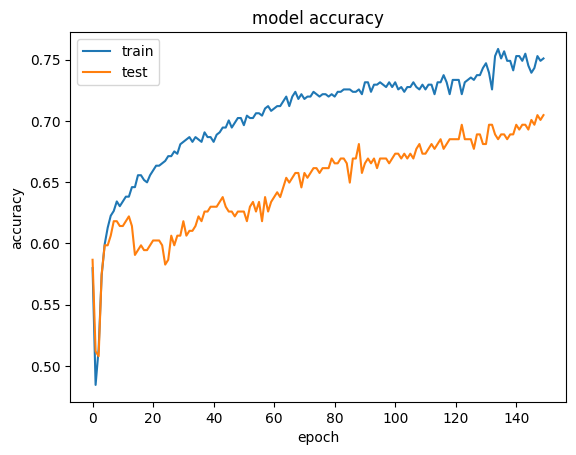

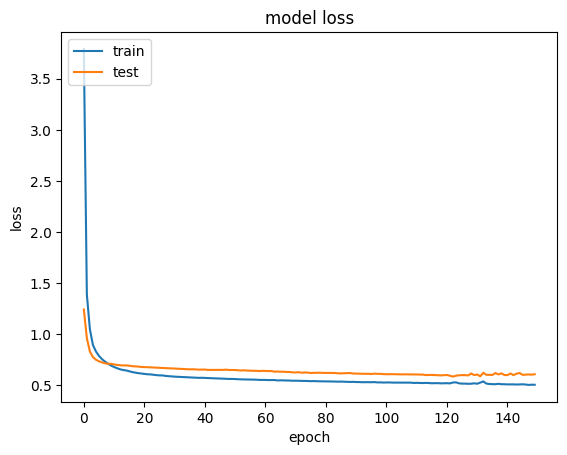

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()